넘파이2텐서 > 텐서2넘파이 : 넘퍼아에서 텐서 넘어가는게 리소스가 더 많이 든다.

In [1]:
import numpy as np
import tensorflow as tf

a = np.array([1, 2, 3, 4, 5])
np.add.reduce(a)

15

In [2]:
tf.test.is_built_with_cuda()

True

In [3]:
tf.reduce_sum([1, 2, 3, 4, 5])

<tf.Tensor: id=6, shape=(), dtype=int32, numpy=15>

# 텐서플로 넘파이 튜토리얼

https://www.tensorflow.org/tutorials/load_data/numpy

넘파이에서 텐서 넘어가는 것은 리소스가 든다. 지금은 작은 데이터라서 리소스 차이를 못 느끼는 것이다. 피클링은 객체를 저장하는 것을 말한다. 근데 피클링은 문제점이 있다. 3.2버전과 3.2.1버전에서 열리지 않았던 문제점이 있다. 그 때부터, json을 이용해서 피클링 하라고 하는데 지금은 그런 문제는 없다.

넘파이는 피클링 하는 방식이 2가지가 있다. npz, npy 2가지가 았다.

In [4]:
DATA_URL = 'https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'

path = tf.keras.utils.get_file('mnist.npz', DATA_URL)
with np.load(path) as data: # 전역에서 다 살아남는 애들이다.
    train_examples = data['x_train']
    train_labels = data['y_train']
    test_examples = data['x_test']
    test_labels = data['y_test']

### Load NumPy arrays with tf.data.Dataset

텐서로 데이터 관리한다고 하면, 다 tf.data.Dataset으로 관리하는 것이다. 다른 분야보다 이미지는 리소스가 많이 들기 때문에, 이것으로 관리해야 한다. 사실 우리 mnist는 다 내부적으로 npz 파일로 되어 있다.

 - from_tensor: 한 묶음으로 관리한다.
 - from_tensor_slice: 쪼개기 좋다.

In [5]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_examples, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_examples, test_labels))

In [6]:
train_dataset2 = tf.data.Dataset.from_tensors((train_examples, train_labels))

In [7]:
train_dataset # 잘 쪼갤 수 있다.

<TensorSliceDataset shapes: ((28, 28), ()), types: (tf.uint8, tf.uint8)>

In [8]:
train_dataset2 # 텐서를 한묶음으로 관리

<TensorDataset shapes: ((60000, 28, 28), (60000,)), types: (tf.uint8, tf.uint8)>

### Use the datasets

In [20]:
BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [21]:
dir(train_dataset) # __iter__가 있다.
# 텐서플로에서는 학습시킬때, for를 이용해서 하라고 되어 있다. 최적화가 되었다.

['_GeneratorState',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_add_variable_with_custom_getter',
 '_apply_options',
 '_as_serialized_graph',
 '_batch_size',
 '_checkpoint_dependencies',
 '_component_metadata',
 '_consumers',
 '_deferred_dependencies',
 '_drop_remainder',
 '_flat_shapes',
 '_flat_structure',
 '_flat_types',
 '_from_components',
 '_functions',
 '_gather_saveables_for_checkpoint',
 '_graph',
 '_graph_attr',
 '_handle_deferred_dependencies',
 '_has_captured_ref',
 '_input_dataset',
 '_inputs',
 '_is_graph_tensor',
 '_list_extra_dependencies_for_serialization',
 '_list_functions_for_serialization',
 

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [25]:
model.fit(train_dataset, epochs=10)

Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 3.9399 - sparse_categorical_accuracy: 0.8847
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.5674 - sparse_categorical_accuracy: 0.9257
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3978 - sparse_categorical_accuracy: 0.9468
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3282 - sparse_categorical_accuracy: 0.9553
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2974 - sparse_categorical_accuracy: 0.9599
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2673 - sparse_categorical_accuracy: 0.9656
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2522 - sparse_categorical_accuracy: 0.9679
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.2436 - sparse_categorical_accuracy: 0.9699
Epoch 9/10
938/938 [============================

# 텐서플로 이미지 튜토리얼

1. 케라스를 이용하는 방법 (케라스 내부 이미지 라이브러리가 PIL로 돌아감)

그러니까 케라스하고 PIL은 깊은 관계가 있는 것이다.

In [3]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os # 이미지 경로 처리
import tensorflow as tf

In [4]:
tf.__version__

'2.0.0'

In [10]:
import pathlib
data_dir = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         fname='flower_photos', untar=True) # untar는 압축푸는 옵션
data_dir = pathlib.Path(data_dir)

In [11]:
data_dir

WindowsPath('C:/Users/white/.keras/datasets/flower_photos')

### 윈도우와 리눅스 경로 호환 문제

윈도우는 \로 구분되고, 리눅스는 /로 구분되어서 서로 호환이 어렵다. 그래서 도입된 것이 os.path이다.

In [12]:
p = pathlib.Path('./')
p

WindowsPath('.')

In [13]:
x = p.iterdir() # next 써서 하나하나씩 뽑아낼 수도 있다.

In [14]:
p/'Untitled Folder' # 연산자 오버로딩도 지원한다.
# 이런 것이 매우 간단하기 때문에, pathlib을 많이 쓴다. 월등히 편하다.

WindowsPath('Untitled Folder')

### Retrieve the images

In [15]:
data_dir.glob('*/*.jpg') # glob은 원래 파이썬 패키지다. 
# 경로에 있는 모든 jpg를 찾아준다.
# / 는 폴더를 구분하는 것을 말해준다.

<generator object Path.glob at 0x00000194F5205048>

In [16]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [17]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

array(['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'],
      dtype='<U10')

이미지 처리할 때, 하나의 폴더 안에 많은 이미지가 있으면 버벅된다. 그래서 보통 어떻게 하냐면, 클래스별로 폴더 구조를 만들어두고, 관련 데이터들을 클래스별로 집어넣는다. 이게 가장 대중적인 방법이다. 일반화하기 좋다. 100개짜리 있으면 한 폴더에 있을경우, 골치가 아프다. 그래서 이런 방법이 중요한 것이다.

★★★ glob은 아주 중요하다. 패턴 찾아서 임폴트 도와주는 애이다.

In [18]:
x = data_dir.glob('*/*.jpg')

In [19]:
t = next(x)

WindowsPath 이런게 튀어나오는데, 파일의 3대 요소??

1. 파일이름
2. 확장자
3. 경로

In [86]:
t.name # 이름

'100080576_f52e8ee070_n.jpg'

In [87]:
t.name.split('.')[-1] # 확장자

'jpg'

In [88]:
t # 경로

WindowsPath('C:/Users/white/.keras/datasets/flower_photos/데이지/100080576_f52e8ee070_n.jpg')

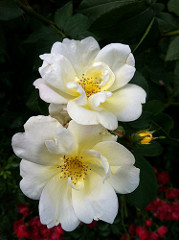

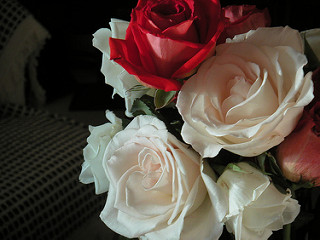

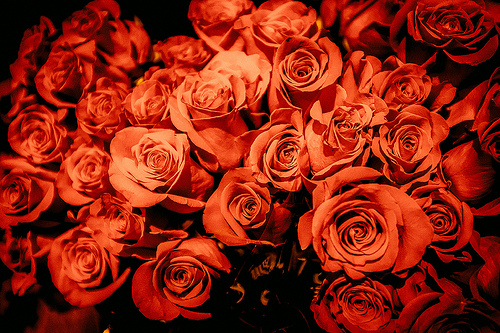

In [53]:
roses = list(data_dir.glob('roses/*'))

for image_path in roses[:3]:
    display.display(Image.open(str(image_path)))

이미지 사이즈가 다 다르다는 문제점이 있다.

이미지 크기 바꾸는 방법 ★★★

1. crop
2. 리사이즈

근데 3670장 다 크롭을 해야 할까? 좀 힘들다... 한방에 다 할 수 있는 방법이 있다. 리사이즈로 간다. 크롭하는게 더 좋긴 한다. 근데 이것도 크롭을 다 맞춰줘야 하긴 하다. 오픈cv로 1줄로 하는 방법, PIL도 한줄로 할 수 있다.

### Load using keras.preprocessing

https://keras.io/preprocessing/image/

대부분 가장 많이 사용하는 애들을 다 만들어놔서, 전처리하기가 아주 쉽다. 이것도 다 개노가다다. 이것에 따라서 성능이 바뀌어 버리기 때문. 사용하는 방법은 케라스답게 아주 쉽게 사용할 수 있다. 

In [118]:
list(iter(data_dir.glob('장미/*')))[0]

WindowsPath('C:/Users/white/.keras/datasets/flower_photos/장미/10090824183_d02c613f10_m.jpg')

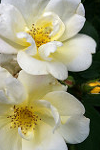

In [129]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(list(iter(data_dir.glob('장미/*')))[0])
# plt.imshow(img)
img.crop((50, 50, 150, 200))

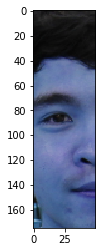

In [148]:
import cv2

img = cv2.imread('C:/aaa.png') # opencv는 한글 지원안됨. 원섭이만 불러와짐
plt.imshow(img[25:200, 50:100]) # opencv에서는 그냥 이렇게!

In [149]:
import tensorflow as tf
import tensorflow.keras.preprocessing

In [60]:
# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

내부적으로 PIL로 자동화해준다. 이미지 제너레이터는 수많은 이미지들을 변화시키는 것이다. 싹다 제너레이터를 통과시키면서 새로운 결과물을 나오게 할 수 있다. flow가 들어가는 애들을 살펴보자.

In [154]:
image_generator.flow_from_dataframe # 판다스 이용하는 것이다.

<bound method ImageDataGenerator.flow_from_dataframe of <tensorflow.python.keras.preprocessing.image.ImageDataGenerator object at 0x00000280962F7B88>>

In [155]:
BATCH_SIZE = 32
IMG_HEIGHT = 224 # 타켓사이즈를 맞춰주면 자동적으로 맞춰준다. ★★★
IMG_WIDTH = 224 # 타켓사이즈를 맞춰주면 자동적으로 맞춰준다. ★★★
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [156]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
#                                                      target_size = (1024, 1024),
                                                     classes = ['데이지', '민들레', 
                                                               '장미', '해바라기', '튤립'])
# ['데이지', '민들레', '장미', '해바라기', '튤립'])

Found 3670 images belonging to 5 classes.


In [162]:
'__iter__' in dir(train_data_gen)
'__next__' in dir(train_data_gen) # 다 들어가 있으니 list()써서 한번에 담아버려

True

In [165]:
x1, x2 = next(train_data_gen)

In [166]:
print(x1.shape) # target size 안 맞춰주면 기본적으로 256으로 맞춰준다. ★
print(x2.shape)

(32, 224, 224, 3)
(32, 5)


In [167]:
train_data_gen.classes # 클래스가 나온다.

array([0, 0, 0, ..., 4, 4, 4])

In [168]:
train_data_gen.num_classes # 클래스 개수

5

In [169]:
train_data_gen.class_indices # 클래스별 라벨링을 알려준다.
# classes를 안해줘도 자동으로 해준다. 아주 좋다.
# 근데 내가 클래스를 만들수도 있다.
# 

{'데이지': 0, '민들레': 1, '장미': 2, '해바라기': 3, '튤립': 4}

In [180]:
train_data_gen

이미지에 글자쓰는 것. opencv는 안된다. PIL은 이게 된다! ★★★

PIL은 케라스 내부에 있으므로, 한글경로 있어도 되는게 중요한 거다.

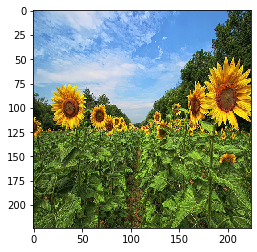

In [170]:
import matplotlib.pyplot as plt

plt.imshow(x1[2])

이미지 크기를 늘렸는데도, 깨지지 않는다. 니얼리스터 인터폴레이션을 해서 깨지지 않는다. 아주 좋다.

### Load using tf.data

The above keras.preprocessing method is convienient, but has two downsides:

1. It's slow. See the performance section below.
2. It lacks fine-grained control.
3. It is not well integrated with the rest of TensorFlow.

To load the files as a tf.data.Dataset first create a dataset of the file paths:

In [20]:
tf.data.Dataset.list_files() 
# file pattern을 넣어야 한다. glob, regurlar exp, pathlib, fnmatch 다 패턴이다.
# 기본 패턴은 glob에 있는 패턴 쓴다고 생각하면 된다.

TypeError: list_files() missing 1 required positional argument: 'file_pattern'

In [24]:
data_dir

WindowsPath('C:/Users/white/.keras/datasets/flower_photos')

In [21]:
data_dir/'*/*' # 연산자 오버로딩 지원한다.
str(data_dir/'*/*')

'C:\\Users\\white\\.keras\\datasets\\flower_photos\\*\\*'

In [22]:
import os
os.listdir('./') # 이런것도 있다.

['.ipynb_checkpoints',
 '191104_01_기초파이썬.ipynb',
 '191105_반복문,예외처리,함수.ipynb',
 '191106_함수형패러다임, 컴프리헨션, Lazy, decorator.ipynb',
 '191107_데코, 언더바, 별.ipynb',
 '191108_Mastering Derocator.ipynb',
 '191108_수업자료',
 '191108_수업자료.zip',
 '191111_Introduction to NumPy.ipynb',
 '191111_기본개념.ipynb',
 '191111_텐서플로와의 비교.ipynb',
 '191112_np_linspace,sequence,stride,reshape,resize,concatenate,stack.ipynb',
 '191113_split,r_,축바꾸기,Image.ipynb',
 '191114_crop,PIL.ipynb',
 '191115_einsum,내적.ipynb',
 '191118_numpy_과제',
 '191118_좌표축, 원그리기.ipynb',
 '191120_Moduler,세츄에이션방식.ipynb',
 '191122_머신러닝 기본, train_test_split.ipynb',
 '191126_opencv의 knn.ipynb',
 '191127_.ipynb',
 '191127_pca.ipynb',
 '191128_딥러닝도입.ipynb',
 '191129_.ipynb',
 '191129_keras2.ipynb',
 '191202_.ipynb',
 '191203_에스티메이터, gradientTape.ipynb',
 '191203_에스티메이터, gradientTape.ipynb.txt',
 '191203_에스티메이터, gradientTape_(2).zip',
 '191204_체크포인트,사이킷케라스연동.ipynb',
 '191205_딥러닝오버피팅.ipynb',
 '191206_tensorboard.ipynb',
 '191207_딥러닝복습.ipynb',
 'all.zip',
 

In [25]:
data_dir/'*/*'

WindowsPath('C:/Users/white/.keras/datasets/flower_photos/*/*')

In [23]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'))

In [172]:
type(list_ds) # Adapter라는 것이 나온다.

tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter

어댑터는 디자인 패턴에 나오는 개념 중 하나이다. 텐서 슬라이스와 비슷하게, 셔플/take 다 할 수 있다. 텐서로 바꿔주기 위한 중간단계 쯤으로 기억하면 된다.

In [185]:
a = list_ds.take(4)
next(iter(a)).numpy().decode('utf-8') # 이렇게 디코드를 쓸 수 있다. 안심해라.

'C:\\Users\\white\\.keras\\datasets\\flower_photos\\장미\\15750320284_22ef21c682.jpg'

numpy=b'C:\\Users\\white\\.keras\\datasets\\flower_photos\\\xed\x8a\xa4\xeb\xa6\xbd\\8454707381_453b4862eb_m.jpg'

bytes -> b라는 것이 붙는다. 애들은 유니코드를 지원 안한다. 한글이 안된다. 나는 폴더 명 다 바꿔놔서 좀 이상하게 나온다. 얘는 한글을 코드화 시켜가지고 나오는 애들이다. 인코딩 하면 해결된다.

In [186]:
for f in list_ds.take(5):
    print(f.numpy()) # 이런식으로 bytes 경로로 관리해준다. 한글 지원 되는거다!

b'C:\\Users\\white\\.keras\\datasets\\flower_photos\\\xeb\xaf\xbc\xeb\x93\xa4\xeb\xa0\x88\\2457473644_5242844e52_m.jpg'
b'C:\\Users\\white\\.keras\\datasets\\flower_photos\\\xed\x8a\xa4\xeb\xa6\xbd\\3502615974_ef4bd13202_n.jpg'
b'C:\\Users\\white\\.keras\\datasets\\flower_photos\\\xed\x8a\xa4\xeb\xa6\xbd\\8713391394_4b679ea1e3_n.jpg'
b'C:\\Users\\white\\.keras\\datasets\\flower_photos\\\xec\x9e\xa5\xeb\xaf\xb8\\6241886381_cc722785af.jpg'
b'C:\\Users\\white\\.keras\\datasets\\flower_photos\\\xeb\xaf\xbc\xeb\x93\xa4\xeb\xa0\x88\\7843447416_847e6ba7f4_m.jpg'


In [187]:
x = b'test'
dir(x) # str과 굉장히 비슷하다. b붙으나 안붙으나 크게 유의안하고 쓸 수 있다.

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'center',
 'count',
 'decode',
 'endswith',
 'expandtabs',
 'find',
 'fromhex',
 'hex',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdigit',
 'islower',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',
 'zfill']

### get_label 함수 이해하기

In [188]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

# 파일 경로를 넣으면, 원핫으로 라벨을 리턴
def get_label(file_path):
    # convert the path to a list of path components
    parts = tf.strings.split(file_path, os.path.sep)
    # The second to last is the class-directory
    return parts[-2] == CLASS_NAMES

In [212]:
for i in list_ds.take(1):
    print(get_label(i.numpy()))

tf.Tensor([False False False  True False], shape=(5,), dtype=bool)


### decode_img 함수 이해하기

In [189]:
# 이미지를 불러와서 디코딩 한 후, 새로운 사이즈로 만들어줌
def decode_img(img):
    # convert the compressed string to a 3D uint8 tensor
    img = tf.image.decode_jpeg(img, channels=1)
    # Use `convert_image_dtype` to convert to floats in the [0,1] range.
    img = tf.image.convert_image_dtype(img, tf.float32)
    # resize the image to the desired size.
    return tf.image.resize(img, [IMG_WIDTH, IMG_HEIGHT])

In [218]:
a = next(data_dir.glob('*/*'))

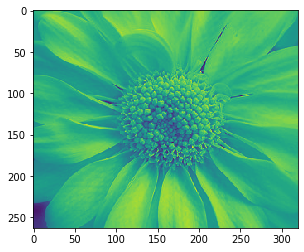

In [232]:
img_test = tf.io.read_file(str(a))
img_test = tf.image.decode_jpeg(img_test, channels=1)
plt.imshow(img_test.numpy().reshape(263, 320))

### process_path 이해하기

In [8]:
# 경로를 넣으면, 리사이즈 된 이미지와 라벨을 반환
def process_path(file_path):
    label = get_label(file_path)
    # load the raw data from the file as a string
    img = tf.io.read_file(file_path)
    img = decode_img(img)
    return img, label

tf.string은 파일 타입이다.

In [235]:
type(tf.string) # 얘는 데이터 형태의 타입이다.
type(tf.io)

module

In [234]:
# dir(tf.io)

In [10]:
labeled_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

NameError: name 'list_ds' is not defined

In [240]:
def prepare_for_training(ds, cache=True, shuffle_buffer_size=1000):
    # This is a small dataset, only load it once, and keep it in memory.
    # use `.cache(filename)` to cache preprocessing work for datasets that don't
    # fit in memory.
    if cache:
        if isinstance(cache, str):
            ds = ds.cache(cache)
        else:
            ds = ds.cache()

    ds = ds.shuffle(buffer_size=shuffle_buffer_size)

    # Repeat forever
    ds = ds.repeat()

    ds = ds.batch(BATCH_SIZE)

    # `prefetch` lets the dataset fetch batches in the background while the model
    # is training.
    ds = ds.prefetch(buffer_size=AUTOTUNE)

    return ds

In [241]:
train_ds = prepare_for_training(labeled_ds)

image_batch, label_batch = next(iter(train_ds))

In [243]:
label_batch

<tf.Tensor: id=30199, shape=(32, 5), dtype=bool, numpy=
array([[False, False,  True, False, False],
       [False, False, False, False,  True],
       [False, False, False,  True, False],
       [False,  True, False, False, False],
       [False, False, False, False,  True],
       [False, False,  True, False, False],
       [ True, False, False, False, False],
       [False,  True, False, False, False],
       [False,  True, False, False, False],
       [False, False, False, False,  True],
       [ True, False, False, False, False],
       [False, False,  True, False, False],
       [False, False,  True, False, False],
       [False,  True, False, False, False],
       [False, False, False, False,  True],
       [False, False,  True, False, False],
       [False, False, False, False,  True],
       [False,  True, False, False, False],
       [False, False,  True, False, False],
       [ True, False, False, False, False],
       [ True, False, False, False, False],
       [False, False

tf.data.Dataset은 

1. time contral x
2. tf.image.resize: 이미지 데이터 쉽게 처리해주는 애들 모아두었다.

https://www.tensorflow.org/tutorials/load_data/images

이미지 데이터 불러들이는 것까지 했다. 내일은 학습방향쪽으로 갈 것이다.